# MOVIE RECOMMENDATION SYSTEM

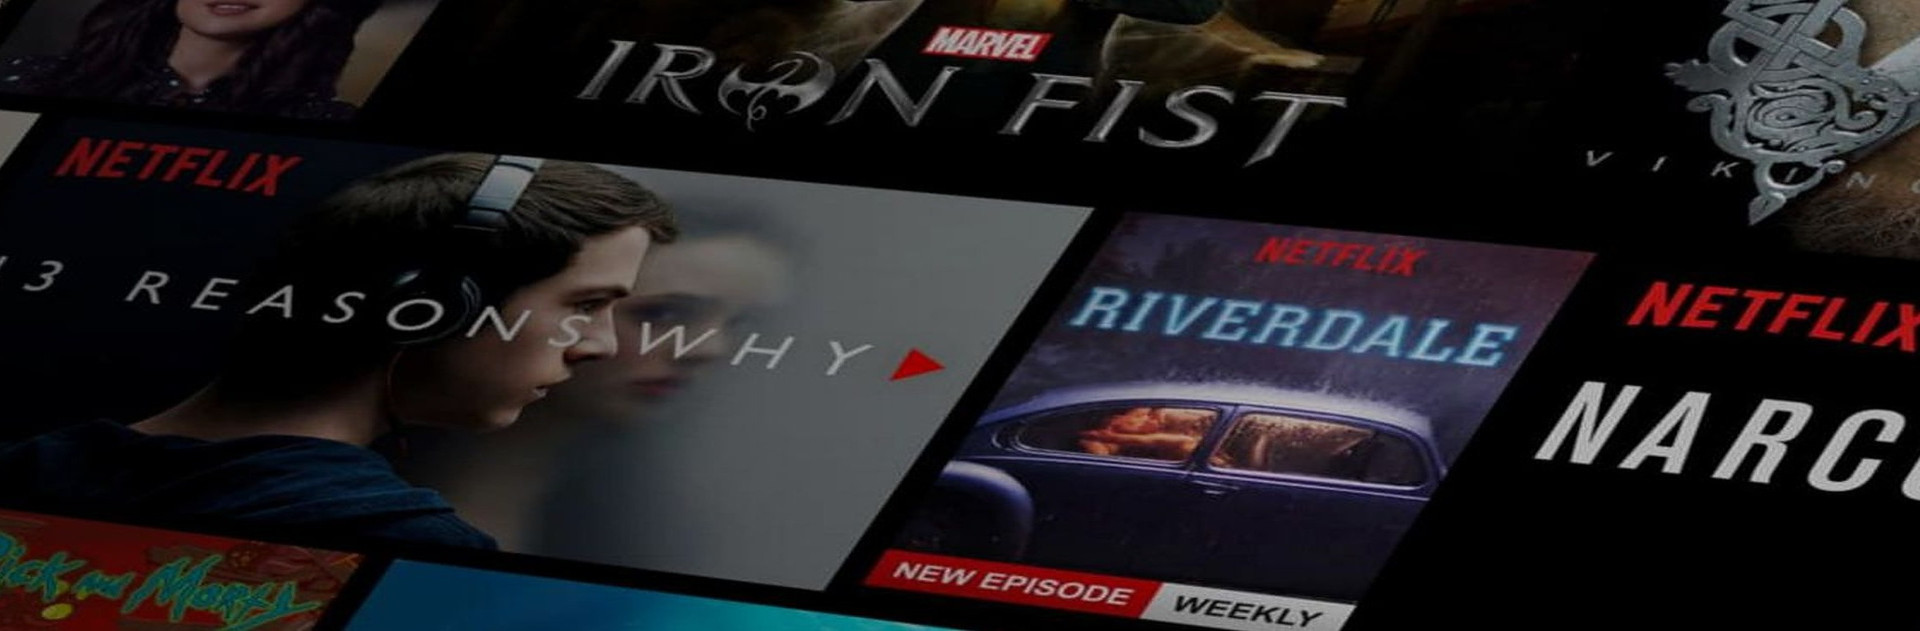

In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Loading the dataset and preprocessing

In [3]:
data = pd.read_csv('/Users/hakeemwikireh/Desktop/DATASETS/movies.csv')

In [4]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
data.shape
print('Columns: ', data.shape[1])
print('Rows: ', data.shape[0])

Columns:  24
Rows:  4803


### Checking for Null values

In [6]:
data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

#### We have some null values but first I will select the features from the data that will help in movie recommendation.

Columns of interest = genres, keywords, tagline, cast, director

NB: You can select as many as you think will help.

In [7]:
data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [8]:
features = ['genres', 'keywords', 'tagline', 'cast', 'director']
features

['genres', 'keywords', 'tagline', 'cast', 'director']

In [9]:
for feature in features:
        data[feature] = data[feature].fillna('')

In [10]:
data.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

### We have no null values in the selected columns. Now, I will combine all the selected columns in order to apply my Tfidfvectorizer

In [11]:
features

['genres', 'keywords', 'tagline', 'cast', 'director']

In [12]:
combined_features = data['genres'] + ' ' + data['keywords'] + ' ' + data['tagline'] + ' ' + data['cast'] + ' ' + data['director']

In [13]:
combined_features

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [14]:
vectorizer = TfidfVectorizer()

In [15]:
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.11280357148547558
  (0, 13024)	0.19423620601088706
  (0, 10229)	0.160586854000953
  (0, 8756)	0.22709015857011813
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.1984326396510037
  (0, 14064)	0.2059609041508414
  (0, 13319)	0.21774705394124838
  (0, 17290)	0.20197912553916564
  (0, 17007)	0.23643326319898794
  (0, 13349)	0.15021264094167083
  (0, 11503)	0.2721131005698365
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.12821263228505786
  (0, 15261)	0.07095833561276564
  (0, 4945)	0.24025852494110755
  (0, 14271)	0.21392179219912874
  (0, 3225)	0.24960162956997733
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.3396275221095982
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661422
  (0, 3678)	0.21392179219912874
  (0, 5437)	0.10364139873166359
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672)

### Cosine Similarity
We'll use cosine similarity to find movies similar to a given movie

In [16]:
similarity = cosine_similarity(feature_vectors)

In [17]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [18]:
# This will mean that when it takes a movie it will find similarity 
print(similarity.shape)

(4803, 4803)


In [19]:
# Taking User input for the movie
movie_name = input('Enter the name of your movie: ')
movie_name

'Avengers'

In [20]:
# Converting the title column in the dataset to a list
list_of_titles = data['title'].to_list()
print(list_of_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [21]:
# Using Difflib to get close match of the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, list_of_titles)
find_close_match

['The Avengers', 'Swingers']

In [22]:
close_match = find_close_match[0]
close_match

'The Avengers'

In [23]:
# Finding the index of the movie with title
movie_index = data[data['title'] == close_match]['index'].values[0]
print(movie_index)

16


In [24]:
# Getting a list of similar movies
similarity_score = list(enumerate(similarity[movie_index]))
print(similarity_score)

[(0, 0.034263405780616416), (1, 0.018757441743698595), (2, 0.03907993864609116), (3, 0.006602224357539789), (4, 0.057215392028041434), (5, 0.014194201691251136), (6, 0.023587971781871248), (7, 0.7860896884964058), (8, 0.00804502322103816), (9, 0.16210160555183878), (10, 0.07691564861356004), (11, 0.012172136863535382), (12, 0.01399044405244746), (13, 0.012631427434045385), (14, 0.18373369962648914), (15, 0.045636296844955834), (16, 1.0000000000000004), (17, 0.013383483902995971), (18, 0.025294146965587617), (19, 0.01188236224021718), (20, 0.11215733913329529), (21, 0.027050077660405826), (22, 0.0070347887180838425), (23, 0.03665396207519357), (24, 0.01292652624563084), (25, 0.01072728635031104), (26, 0.404696940760001), (27, 0.03121225816313766), (28, 0.0688711924846143), (29, 0.025483413379835264), (30, 0.11350883208096148), (31, 0.21487810271500668), (32, 0.029868095335032145), (33, 0.25051540387386095), (34, 0.0), (35, 0.03607946039832522), (36, 0.05009193086600238), (37, 0.00818989

In [26]:
# Sorting Movies based on their similarity score from highest to smallest
sorted_similar_movies = sorted(similarity_score, key=lambda x:x[1], reverse=True)
print(sorted_similar_movies)

[(16, 1.0000000000000004), (7, 0.7860896884964058), (85, 0.43015328546076637), (26, 0.404696940760001), (79, 0.3933653363061259), (126, 0.31280336320342406), (511, 0.28923960858946623), (174, 0.2886296396323889), (64, 0.27464767891998554), (182, 0.2727641127715291), (129, 0.2692851631363999), (203, 0.2566097349291583), (33, 0.25051540387386095), (788, 0.24366990820486287), (46, 0.2400669147214845), (169, 0.23702484619175357), (38, 0.23389520101069375), (4759, 0.23084821219774054), (68, 0.22704403782296806), (31, 0.21487810271500668), (14, 0.18373369962648914), (782, 0.18255290756686623), (870, 0.18215883046686446), (101, 0.18018869067098509), (94, 0.16311290114551136), (9, 0.16210160555183878), (1294, 0.15229231204591695), (1192, 0.1517599526469107), (241, 0.15100480467438168), (4401, 0.14805269610442987), (2197, 0.1465079670557534), (1720, 0.1456998046500526), (713, 0.14527838542596033), (1740, 0.14444382118424326), (122, 0.14409292201469678), (242, 0.14117187282097482), (700, 0.13869

In [28]:
# Print the name of these similar movies based on their indexes

i = 1
for movie in sorted_similar_movies:
    index = movie[0]
    index_title = data[data['index'] == index]['title'].values[0]
    if (i <21):
        print(i, '.', index_title)
        i+=1

Movies suggested for you: 

1 . The Avengers
2 . Avengers: Age of Ultron
3 . Captain America: The Winter Soldier
4 . Captain America: Civil War
5 . Iron Man 2
6 . Thor: The Dark World
7 . X-Men
8 . The Incredible Hulk
9 . X-Men: Apocalypse
10 . Ant-Man
11 . Thor
12 . X2
13 . X-Men: The Last Stand
14 . Deadpool
15 . X-Men: Days of Future Past
16 . Captain America: The First Avenger
17 . The Amazing Spider-Man 2
18 . The Image Revolution
19 . Iron Man
20 . Iron Man 3


## Creating a centralized recommendation system

In [31]:
def get_recommendation(): 
    movie_name = input('Enter the name of your movie: ')


    list_of_titles = data['title'].to_list()

    find_close_match = difflib.get_close_matches(movie_name, list_of_titles)

    close_match = find_close_match[0]

    movie_index = data[data['title'] == close_match]['index'].values[0]

    similarity_score = list(enumerate(similarity[movie_index]))

    sorted_similar_movies = sorted(similarity_score, key=lambda x:x[1], reverse=True)


    print('Movies suggested for you: \n')

    i = 1

    for movie in sorted_similar_movies:
        index = movie[0]
        index_title = data[data['index'] == index]['title'].values[0]
        if (i <21):
            print(i, '.', index_title)
            i+=1

In [32]:
get_recommendation()

Movies suggested for you: 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy
20 . Deadpool
